# Project: Phoneme Classification

In [1]:
PATH ="data/phoneme.csv"

In [3]:
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
# define the dataset location
filename = PATH
# load the csv file as a data frame 
dataframe = read_csv(filename, header=None) # summarize the shape of the dataset 
print(dataframe.shape)
# summarize the class distribution
target = dataframe.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
  per = v / len(target) * 100
  print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

(5404, 6)
Class=0.0, Count=3818, Percentage=70.651%
Class=1.0, Count=1586, Percentage=29.349%


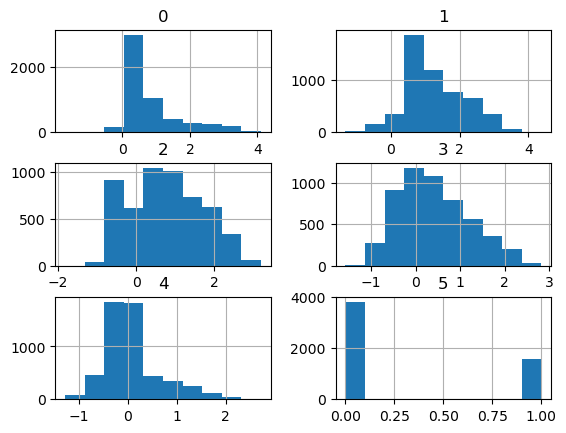

In [4]:
# create histograms of numeric input variables
from pandas import read_csv
from matplotlib import pyplot
# define the dataset location filename = 'phoneme.csv'
# load the csv file as a data frame 
df = read_csv(filename, header=None) 
# histograms of all variables 
df.hist()
pyplot.show()

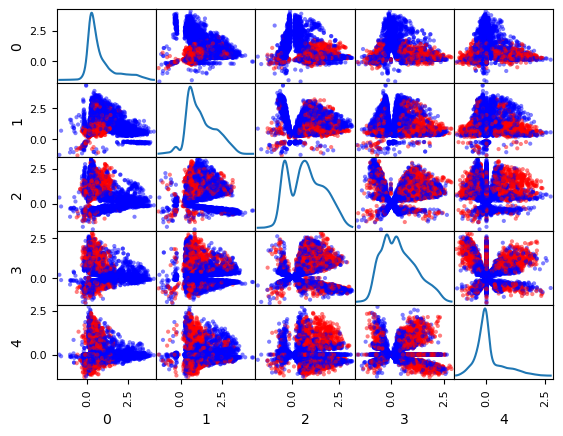

In [6]:
# create pairwise scatter plots of numeric input variables
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# define the dataset location
filename = PATH
# load the csv file as a data frame
df = read_csv(filename, header=None)
# define a mapping of class values to colors 
color_dict = {0:'blue', 1:'red'}
# map each row to a color based on the class value 
colors = [color_dict[x] for x in df.values[:, -1]]
# drop the target variable
inputs = DataFrame(df.values[:, :-1])
# pairwise scatter plots of all numerical variables 
scatter_matrix(inputs, diagonal='kde', color=colors)
pyplot.show()

In [8]:
# test harness and baseline model evaluation
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier
# load the dataset
def load_dataset(full_path):
  # load the dataset as a numpy array
  data = read_csv(full_path, header=None)
  # retrieve numpy array
  data = data.values
  # split into input and output elements
  X, y = data[:, :-1], data[:, -1]
  return X, y
# evaluate a model
def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # define the model evaluation metric
  metric = make_scorer(geometric_mean_score)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
  return scores
# define the location of the dataset
full_path = PATH
# load the dataset
X, y = load_dataset(full_path) # summarize the loaded dataset
print(X.shape, y.shape, Counter(y))
# define the reference model
model = DummyClassifier(strategy='uniform')
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean G-Mean: %.3f (%.3f)' % (mean(scores), std(scores)))

(5404, 5) (5404,) Counter({0.0: 3818, 1.0: 1586})


Mean G-Mean: 0.501 (0.027)


### Evaluate Models

In [9]:

# spot check machine learning algorithms on the phoneme dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
# load the dataset
def load_dataset(full_path):
  # load the dataset as a numpy array
  data = read_csv(full_path, header=None)
  # retrieve numpy array
  data = data.values
  # split into input and output elements
  X, y = data[:, :-1], data[:, -1]
  return X, y
# evaluate a model
def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # define the model evaluation metric
  metric = make_scorer(geometric_mean_score)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
  return scores


# define models to test
def get_models():
  models, names = list(), list()
  # LR
  models.append(LogisticRegression(solver='lbfgs')) 
  names.append('LR')
  # SVM
  models.append(SVC(gamma='scale'))
  names.append('SVM')
  # Bagging 
  models.append(BaggingClassifier(n_estimators=1000)) 
  names.append('BAG')
  # RF 
  models.append(RandomForestClassifier(n_estimators=1000)) 
  names.append('RF')
  # ET 
  models.append(ExtraTreesClassifier(n_estimators=1000)) 
  names.append('ET')
  
  return models, names


# define the location of the dataset
full_path = PATH
# load the dataset
X, y = load_dataset(full_path) # define models
models, names = get_models() 
results = list()
# evaluate each model
for i in range(len(models)):
    # evaluate the model and store results
  scores = evaluate_model(X, y, models[i])
  results.append(scores)
  # summarize and store
  print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>LR 0.636 (0.025)
>SVM 0.803 (0.021)
